# Assignment 2: Graphing Dino Fun World

### Assignment Description

Impressed by your previous work, the administrators of Dino Fun World have asked you to create some charts that they can use in their next presentation to upper management. The data used for this assignment will be the same as the data used for the previous assignment.

The administrators would like you to create four graphs:

Chart 1: A pie chart depicting visits to thrill ride attractions.

Chart 2: A bar chart depicting total visits to food stalls.

* Please query attractions with Category equal to "Food".

Chart 3: A line chart depicting attendance at the newest ride, Atmosfear over the course of the day.

* For this question, use data from the table "sequences". You can assume that all activity sequences are aligned by time (i.e., the first node of all sequences occurred at the same time) and are of the same length.

* You only need to consider the first 16 hours of records in the sequences, which is considered the open hours of the park in one day. Specifically, because an activity sequence from the "sequences" table was updated/recorded every 5 minutes, you need to extract the first 192 items (16h * 60m / 5m = 192).

* Your data list (which will be printed) must be in the format of tuple list (or list of lists). The first item in tuples is irrelevant, but you can put in some meaningful information. The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (190, 4), (191, 5) ].

Chart 4: A box-and-whisker plot depicting total visits to the park's Kiddie Rides.

* The to-be-printed, the  data list must be ordered by AttractionID (a field in the table "attraction").


### Directions

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkin', 'attractions', and 'sequences'. The database file is named 'dinofunworld.db' and is available in the read only directory of the Jupyter Notebook environment (i.e., readonly/dinofunworld.db). It can also be accessed by selecting File > Open > dinofunworld.db.

The information contained in each of these tables is listed below:

`checkin`:
    - The check-in data for all visitors for the day in the park. The data includes two types of check-ins: inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carousel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
Using the provided data, create the four visualizations that the administration requested: the pie chart, bar chart, line chart, and box-and-whisker plot.   

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly.

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

If you choose to download the file and work on your assignment locally, you can also upload your file to each part in the programming assignment submission space. The file you submit should be named "Assignment_2.ipynb".

### Evaluation

There are four parts in the grading, and each part has one test case where the total number of points for all parts is 4. If some part of your data is incorrect, you will get a partial score of 0.25 or 0.50. If the submission fails, we will return the corresponding error messages. If the submission is correct, you will see "Correct" with 1.0 point for each part.

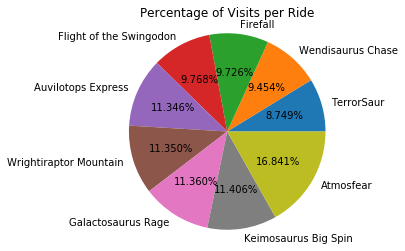

                      Ride  Visits
0               TerrorSaur   14415
1        Wendisaurus Chase   15577
2                 Firefall   16024
3  Flight of the Swingodon   16093
4       Auvilotops Express   18694
5   Wrightiraptor Mountain   18700
6       Galactosaurus Rage   18717
7     Keimosaurus Big Spin   18792
8                Atmosfear   27747


In [21]:
# Graded Cell, PartID: gtMqY
# Make a Pie Chart of the visits to Thrill Ride attractions. For this question,
#  display the pie chart in the notebook and print the data used to create the
#  pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

conn = sqlite3.connect('readonly/dinofunworld.db')
c = conn.cursor()

c.execute("select attraction.Name, count(checkin.visitorId) as ct from checkin left join attraction on checkin.attraction = attraction.AttractionID where lower(attraction.Category) like '%thrill%' group by attraction.Name order by ct")

visits = c.fetchall()
visits_pd = pd.DataFrame.from_records(visits, columns = ['Ride', 'Visits'])
plt.pie(visits_pd['Visits'], labels = visits_pd['Ride'], shadow = False, autopct = '%0.3f%%')
plt.axis('equal')
plt.title('Percentage of Visits per Ride')
plt.show()
print(visits_pd)

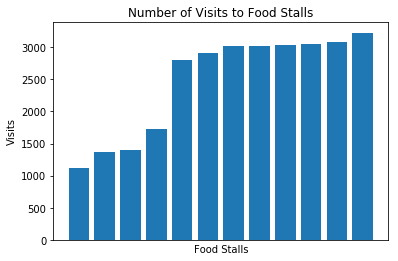

               Food Stalls  Visits
0      Theresaur Food Stop    1116
1       Paleo Shreckwiches    1361
2        Shilobite o'Pizza    1393
3        Krystal Cook Cafe    1725
4       Granite Slab Pizza    2810
5   Plaisantly Popped Corn    2914
6           EberTrex Fries    3018
7            Permafrosties    3018
8           Smoky Wood BBQ    3037
9      Chensational Sweets    3049
10          Floral Funnels    3083
11           Ice Age Cones    3228


In [22]:
# Graded Cell, PartID: 9Ocyl
# Make a bar chart of total visits to food stalls. For this question,
#  display the bar chart in the notebook and print the data used to create the
#  bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])

c.execute("select attraction.Name, count(checkin.visitorId) as ct from checkin left join attraction on checkin.attraction = attraction.AttractionID where lower(attraction.Category) like '%food%' group by attraction.Name order by ct")

visits = c.fetchall()
visits_pd = pd.DataFrame.from_records(visits, columns = ['Food Stalls', 'Visits'])
plt.bar(range(len(visits_pd['Visits'])), visits_pd['Visits'])
plt.xscale(value = 'linear')
plt.xlabel('Food Stalls')
plt.ylabel('Visits')
plt.title('Number of Visits to Food Stalls')
plt.xticks([])
plt.show()
print(visits_pd)

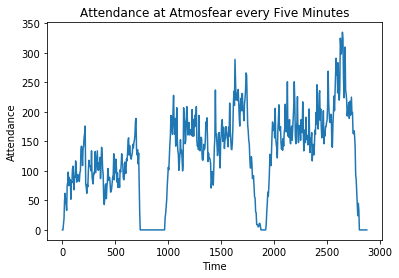

In [30]:
# Graded Cell, PartID: 0zcEV
# Make a line chart of attendance at Atmosfear every five minutes. Again,
#  display the line chart in the notebook and print the data used to create the
#  chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])

c.execute("select attractionId from attraction where attraction.Name = 'Atmosfear'")
attrId = c.fetchone()[0]
c.execute("select visitorID, sequence from sequences where sequence like '%" + str(attrId) + "%'")
sequences = c.fetchall()
sequence_pd = pd.DataFrame.from_records(sequences, columns=['Visitor', 'Sequence'])
#print(sequence_pd)
sequence_pd['SequenceList'] = sequence_pd['Sequence'].apply(lambda s: [1 if x == str(attrId) else 0 for x in s.split("-")])
#print(sequence_pd['SequenceList'])
attendance = np.sum(sequence_pd['SequenceList'].values.tolist(), axis=0)
#print(attendance)
x_list = range(0, len(attendance)*5, 5)
plt.plot(x_list, attendance)
plt.xlabel('Time')
plt.ylabel('Attendance')
plt.title('Attendance at Atmosfear every Five Minutes')
plt.show()

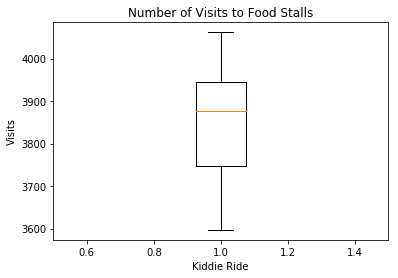

             Kiddie Ride  Visits
0             North Line    3597
1   Flying TyrAndrienkos    3640
2   Cyndisaurus Asteroid    3747
3   Enchanted Toadstools    3747
4        Jeredactyl Jump    3759
5             Stone Cups    3877
6         Blue Iguanodon    3922
7            Stegocycles    3925
8             Beelzebufo    3963
9     Wild Jungle Cruise    4022
10       Sauroma Bumpers    4062


In [31]:
# Graded Cell, PartID: zdzaT
# Make a box plot of total visits to rides in the Kiddie Rides category. For
#  this question, display the box plot in the notebook and print the number of
#  visits to each ride as a list (ex: [3, 4, 5, 6, ...])

c.execute("select attraction.Name, count(checkin.visitorId) as ct from checkin left join attraction on checkin.attraction = attraction.AttractionID where lower(attraction.Category) like '%kiddie%' group by attraction.Name order by ct")

visits = c.fetchall()
visits_pd = pd.DataFrame.from_records(visits, columns = ['Kiddie Ride', 'Visits'])
plt.boxplot(visits_pd['Visits'])
plt.xscale(value = 'linear')
plt.xlabel('Kiddie Ride')
plt.ylabel('Visits')
plt.title('Number of Visits to Food Stalls')
plt.show()
print(visits_pd)